This notebook contains the final graphs and visualizations we want to put on our Data Story website.

### Import libraries and data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pickle
import networkx as nx
import statsmodels.formula.api as smf
%matplotlib inline

In [7]:
# File and folder names
DATA_FOLDER = 'Data/'
CHARACTER_DATASET = DATA_FOLDER + 'characters.pkl'
MOVIE_DATASET = DATA_FOLDER + 'movies.pkl'

SUMMARIES_DATASET = DATA_FOLDER + 'plot_summaries.txt'
NLP_DATASET = DATA_FOLDER + 'corenlp_plot_summaries.tar'

MALE_SENTENCES = DATA_FOLDER + "male_sentences.pkl"
FEMALE_SENTENCES = DATA_FOLDER + "female_sentences.pkl"

MALE_SENTIMENTS = DATA_FOLDER + "male_sentiments.pkl"
FEMALE_SENTIMENTS = DATA_FOLDER + "female_sentiments.pkl"

# Additional datasets
CMU_IMDB = DATA_FOLDER + 'merge_CMU_IMDb.pkl'
ALL_DATASETS = DATA_FOLDER + 'merge_all.pkl'

In [8]:
characters = pd.read_pickle(CHARACTER_DATASET)
movies = pd.read_pickle(MOVIE_DATASET)
df_all = pd.read_pickle(ALL_DATASETS)
G = nx.read_gpickle("Data/matching_1.gpickle")

In [9]:
def col_to_year_fmt(df,col_name):
    '''change format of column col_name of dataframe df to datetime year format'''
    df[col_name] = pd.to_datetime(df[col_name],format='%Y').dt.year

col_to_year_fmt(movies,'Movie_release_date')
col_to_year_fmt(df_all,'Movie_release_date')
col_to_year_fmt(characters,'Movie_release_date')
col_to_year_fmt(characters,'Actor_date_of_birth')

# Drop useless columns
movies.drop(['Movie_runtime'],axis=1, inplace=True)
df_all.drop(['Movie_runtime'],axis=1, inplace=True)

# Drop NaN
characters = characters.dropna()
movies = movies.dropna()

In [10]:
# you can access the log of revenue with log_revenue, log of budget with log_budget
def add_log(df,col,new_col):
    '''add the column new_col to the dataframe df, containing the log10 of column col'''
    df[new_col] = df[col].apply(np.log10)

add_log(movies,'Movie_box_office_revenue','log_revenue')
add_log(df_all,'Movie_box_office_revenue','log_revenue')
add_log(df_all,'budget','log_budget')

In [11]:
characters.Actor_gender = (characters.Actor_gender=='F').apply(int)
characters.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_meters,Actor_ethnicity_Freebase_ID,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974.0,1,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969.0,0,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001.0,Commander Helena Braddock,1949.0,1,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
56,2314463,/m/0734w5,2006.0,Taper Guy,1971.0,0,1.87,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d
76,612710,/m/02wjqm,1999.0,Sandii,1975.0,1,1.68,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq


### Visualization Q1
#### Evolution of fraction of female actors over time

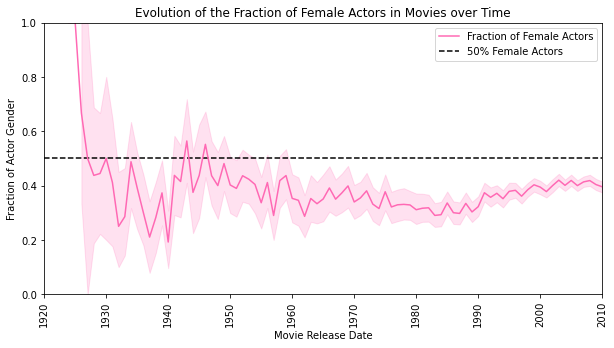

In [61]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = characters, x=characters.Movie_release_date[characters.Movie_release_date > 1919][characters.Movie_release_date < 2011], y='Actor_gender', ax=ax, label='Fraction of Female Actors', color='hotpink')
plt.hlines(0.5,1920,2020,color='black',linestyle='--',label='50% Female Actors')
plt.xlim([1920, 2010])
plt.xlabel('Movie Release Date')
plt.ylim([0, 1])
plt.ylabel('Fraction of Actor Gender')
#plt.grid(visible=True, axis='y')
plt.xticks(rotation=90)
plt.title('Evolution of the Fraction of Female Actors in Movies over Time')
plt.legend()

#### Age and Gender gap

TypeError: unsupported operand type(s) for +: 'float' and 'str'

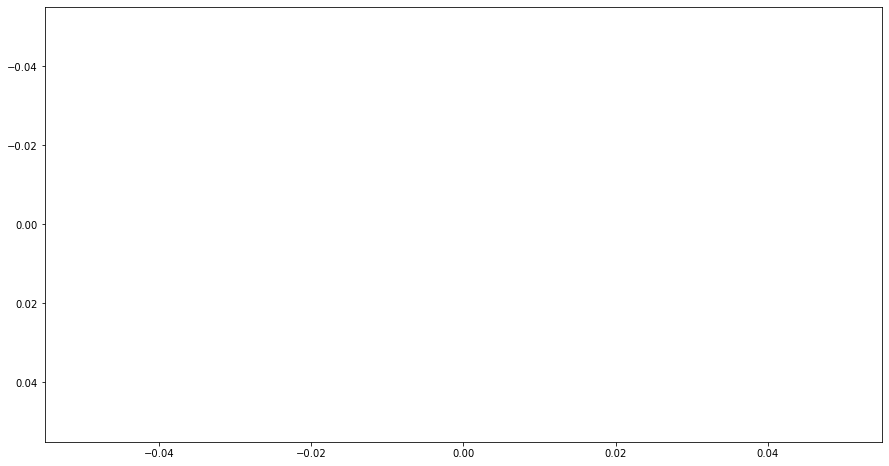

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data = characters, x=characters.Movie_release_date, y='Actor_age_at_movie_release',hue='Actor_gender', ax=ax)
plt.grid(visible=True)
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.title('Evolution of median age of the actor (1=female)')

C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Alice\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=ke

AttributeError: 'numpy.ndarray' object has no attribute 'median'

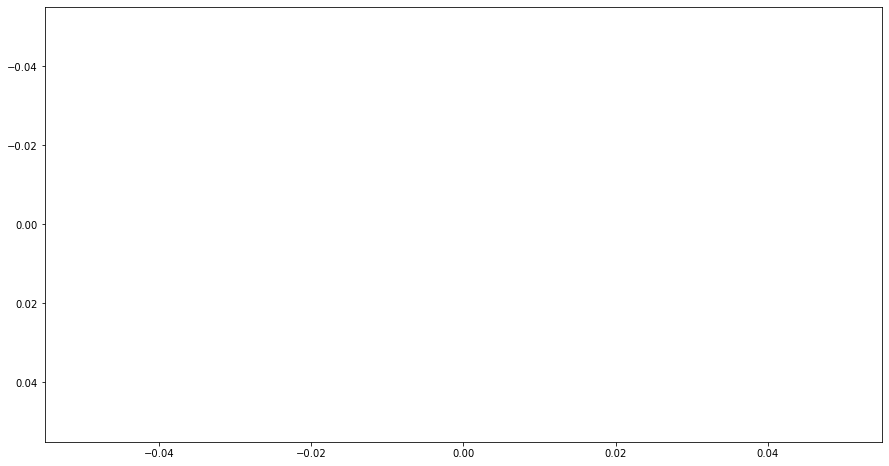

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data = characters, x=characters.Movie_release_date, y='Actor_age_at_movie_release',hue='Actor_gender', palette= sns.color_palette('mako_r',2), estimator='median', ax=ax)
plt.xlim([1920, 2010])
plt.xlabel('Movie Release Date')
plt.ylim([0, 1])
plt.ylabel('Actor Age at Movie Release')
#plt.grid(visible=True)
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.title('Evolution of Median Age of Actors among Genders')

### Visualizations for the matching study (success)

I added here the datasets:
- df_gender contains the number of male/female actors per film, and the percentage of females
- df_gender_eng is the same, filtered on American movies, in English or Amercian
- movies_treat/movies_control are the 2 dataframes containing the data of df_all before the matching, for each group (and American films, in English/American)
- df_match contains all the films that have been matched. It contains a column 'group' which equald 'treat' if the film is in the treated group, 'control' otherwise (simple to make graphs: use hue='group')
- df_before_match contains all films in USA in English or American. It has the same columns as df_match.

In [16]:
# Group by film (wiki id)
grouped = characters[['Wikipedia_movie_ID','Actor_gender']].groupby(characters.Wikipedia_movie_ID)
# count nb of actor for each gender
df_gender = grouped.agg('sum')
df_gender['nb_m'] = grouped['Actor_gender'].agg('count').values - grouped['Actor_gender'].agg('sum').values
df_gender.rename(columns = {'Actor_gender':'nb_f'}, inplace = True)
# compute the percentage of female actress for each film
df_gender['ratio'] = df_gender['nb_f']/(df_gender['nb_f']+df_gender['nb_m'])*100
global_mean = df_gender.ratio.mean()
df_gender.head()

,nb_f,nb_m,ratio
Wikipedia_movie_ID,,,
3217,2,0,100.000000
3746,0,3,0.000000
3837,1,5,16.666667
4227,0,1,0.000000
4231,3,5,37.500000


In [21]:
# Seleciton of films in USA in english or american
USA = 'United States of America'
eng = 'English Language'
american = 'American English'
mask = movies.apply(lambda x:USA in x.Movie_countries and (eng in x.Movie_languages or american in x.Movie_languages),axis=1)
id_eng = movies.loc[mask,'Wikipedia_movie_ID'].values
df_gender_eng = df_gender[df_gender.index.isin(id_eng)]

eps = 10
nb_actor = 3
sigma_y = df_all.Movie_release_date.std()
control_df = df_gender_eng[df_gender_eng.ratio < global_mean-eps]
treat_df = df_gender_eng[df_gender_eng.ratio > global_mean+eps]
movies_control = df_all[df_all.Wikipedia_movie_ID.isin(control_df.index)]
movies_treat = df_all[df_all.Wikipedia_movie_ID.isin(treat_df.index)]
movies_control.loc[:,'group'] = 'control'
movies_treat.loc[:,'group'] = 'treat'
df_before_match = pd.concat([movies_control,movies_treat],axis=0)

# Standrad deviation in log revenue, and log(geometric means)
std_control = movies_control.log_revenue.std()
std_treat = movies_treat.log_revenue.std()
mean_control = movies_control.log_revenue.mean()
mean_treat = movies_treat.log_revenue.mean()

C:\Users\samje\AppData\Local\Temp\ipykernel_10780\2037839879.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_control.loc[:,'group'] = 'control'
C:\Users\samje\AppData\Local\Temp\ipykernel_10780\2037839879.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_treat.loc[:,'group'] = 'treat'


In [18]:
# Find the minimal matching by distance <-> maximal matching by similarity
matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(G) #(Wiki_id_control, Wiki_id_treat)

C:\Users\samje\anaconda3\lib\site-packages\networkx\algorithms\bipartite\matching.py:569: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  weights_sparse = biadjacency_matrix(


In [19]:
# Creation of the new dataframe
df_match = df_all[df_all.Wikipedia_movie_ID.isin(list(matching.keys()) + list(matching.values()))]
# annotate control/treated group
for key,val in matching.items():
    df_match.loc[df_match.Wikipedia_movie_ID == key,'group'] = 'control'
    df_match.loc[df_match.Wikipedia_movie_ID == val,'group'] = 'treat'
df_match.head()

C:\Users\samje\AppData\Local\Temp\ipykernel_10780\1617604834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match.loc[df_match.Wikipedia_movie_ID == key,'group'] = 'control'


,genre,score,votes,director,writer,star,country,budget,company,Wikipedia_movie_ID,...,tconst,titleType,isAdult,genres,tconstIdentifier,averageRating,numVotes,log_revenue,log_budget,group
76,Comedy,6.9,68000.0,Ivan Reitman,Len Blum,Bill Murray,United States,10000000.0,Columbia Pictures,560511,...,tt0083131,movie,0,"Comedy,War",tt0083131,6.8,74616,7.930934,7.000000,treat
77,Adventure,7.4,59000.0,John Boorman,Thomas Malory,Nigel Terry,United Kingdom,11000000.0,Cinema '84,250699,...,tt0082348,movie,0,"Adventure,Drama,Fantasy",tt0082348,7.3,62537,7.543664,7.041393,treat
79,Action,6.9,42000.0,Desmond Davis,Beverley Cross,Laurence Olivier,United Kingdom,15000000.0,Charles H. Schneer Productions,948548,...,tt0082186,movie,0,"Action,Adventure,Family",tt0082186,6.9,44884,7.612784,7.176091,control
84,Crime,6.6,22000.0,Bob Rafelson,David Mamet,Jack Nicholson,West Germany,12000000.0,CIP Filmproduktion GmbH,5429460,...,tt0082934,movie,0,"Crime,Drama,Romance",tt0082934,6.6,24083,7.086360,7.079181,control
89,Drama,6.8,17000.0,Harold Becker,Darryl Ponicsan,George C. Scott,United States,14000000.0,Major Studio Partners,30863819,...,tt0083169,movie,0,Drama,tt0083169,6.7,18834,7.544108,7.146128,treat
